## HR Analytics on Employee Attrition

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
# Importing all datasets
churn = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
churn.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Inspecting the Dataframe

In [5]:
# Let's check the dimensions of the dataframe
churn.shape

(1470, 35)

In [6]:
# let's look at the statistical aspects of the dataframe
churn.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Let's see the type of each column
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [8]:
# List of variables to map

varlist =  ['Attrition','OverTime']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
churn[varlist] = churn[varlist].apply(binary_map)

In [9]:
pd.pandas.set_option('display.max_columns', None)
churn.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [10]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(churn[['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus']], drop_first=True)

# Adding the results to the master dataframe
churn = pd.concat([churn, dummy1], axis=1)

In [11]:
churn.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0


#### Dropping the repeated variables

In [12]:
# We have created dummies for the below variables, so we can drop them
churn = churn.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus'], 1)

In [13]:
#The varaible was imported as a string we need to convert it to float
#telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')
churn = churn.drop(['Over18','StandardHours','EmployeeCount'],1)

In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

Now we have all variables as numeric.

#### Checking for Outliers

In [15]:
churn.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0


In [16]:
# Checking for outliers in the continuous variables
num_churn = churn[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike']]

In [17]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_churn.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,65.891156,6502.931293,14313.103401,15.209524
std,9.135373,403.509100,20.329428,4707.956783,7117.786044,3.659938
min,18.000000,102.000000,30.000000,1009.000000,2094.000000,11.000000
25%,30.000000,465.000000,48.000000,2911.000000,8047.000000,12.000000
50%,36.000000,802.000000,66.000000,4919.000000,14235.500000,14.000000
75%,43.000000,1157.000000,83.750000,8379.000000,20461.500000,18.000000
90%,50.000000,1356.000000,94.000000,13775.600000,24001.700000,21.000000
95%,54.000000,1424.100000,97.000000,17821.350000,25431.900000,22.000000
99%,58.310000,1485.000000,100.000000,19626.310000,26704.240000,25.000000


From the distribution shown above, we can see that there no outliers in our data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [18]:
# Adding up the missing values (column-wise)
churn.isnull().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager     

we don't have any missing values

### Test-Train Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Putting feature variable to X
X = churn.drop(['Attrition','EmployeeNumber'], axis=1)

X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0


In [21]:
# Putting response variable to y
y = churn['Attrition']

y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [22]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [23]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
178,46,526,1,2,2,92,3,3,1,10453,2137,1,0,25,4,3,3,24,2,3,24,13,15,7,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
971,51,1405,11,2,4,82,2,4,2,13142,24439,3,0,16,3,2,0,29,1,2,5,2,0,3,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1172,29,469,10,3,3,42,2,2,3,5869,23413,9,0,11,3,3,0,8,2,3,5,2,1,4,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
667,41,1085,2,4,2,57,1,1,4,2778,17725,4,1,13,3,3,1,10,1,2,7,7,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
399,31,329,1,2,4,98,2,1,1,2218,16193,1,0,12,3,3,1,4,3,3,4,2,3,2,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

X_train[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']] = scaler.fit_transform(X_train[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])

X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
178,1.008286,-0.696660,-1.011255,-0.878230,-0.646049,1.264844,0.366902,0.858788,-1.614793,0.844485,-1.697658,-0.692427,0,2.646503,2.347905,0.280144,2.564203,1.659329,-0.626800,0.346410,2.837748,2.412851,3.932865,0.825868,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
971,1.566036,1.504689,0.202817,-0.878230,1.165353,0.775162,-1.021119,1.766069,-0.699803,1.416276,1.383049,0.103226,0,0.190419,-0.425912,-0.643793,-0.957013,2.313273,-1.411445,-1.068098,-0.324633,-0.603279,-0.679884,-0.306091,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1172,-0.888064,-0.839410,0.081410,0.095583,0.259652,-1.183563,-1.021119,-0.048494,0.215187,-0.130261,1.241321,2.490184,0,-1.174072,-0.425912,0.280144,-0.957013,-0.433294,-0.626800,0.346410,-0.324633,-0.603279,-0.372367,-0.023101,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
667,0.450536,0.703288,-0.889848,1.069396,-0.646049,-0.449041,-2.409140,-0.955776,1.130177,-0.787535,0.455604,0.501052,1,-0.628276,-0.425912,0.280144,0.216725,-0.171716,-1.411445,-1.068098,0.008249,0.767689,-0.372367,-1.155060,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
399,-0.664964,-1.190023,-1.011255,-0.878230,1.165353,1.558653,-1.021119,-0.955776,-1.614793,-0.906613,0.243980,-0.692427,0,-0.901174,-0.425912,0.280144,0.216725,-0.956450,0.157844,0.346410,-0.491074,-0.603279,0.242666,-0.589081,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [26]:
### Checking the Churn Rate
churn_rate = (sum(churn['Attrition'])/len(churn['Attrition'].index))*100
churn_rate

16.122448979591837

We have almost 16% Churn/Attrition rate

### Looking at Correlations

In [27]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

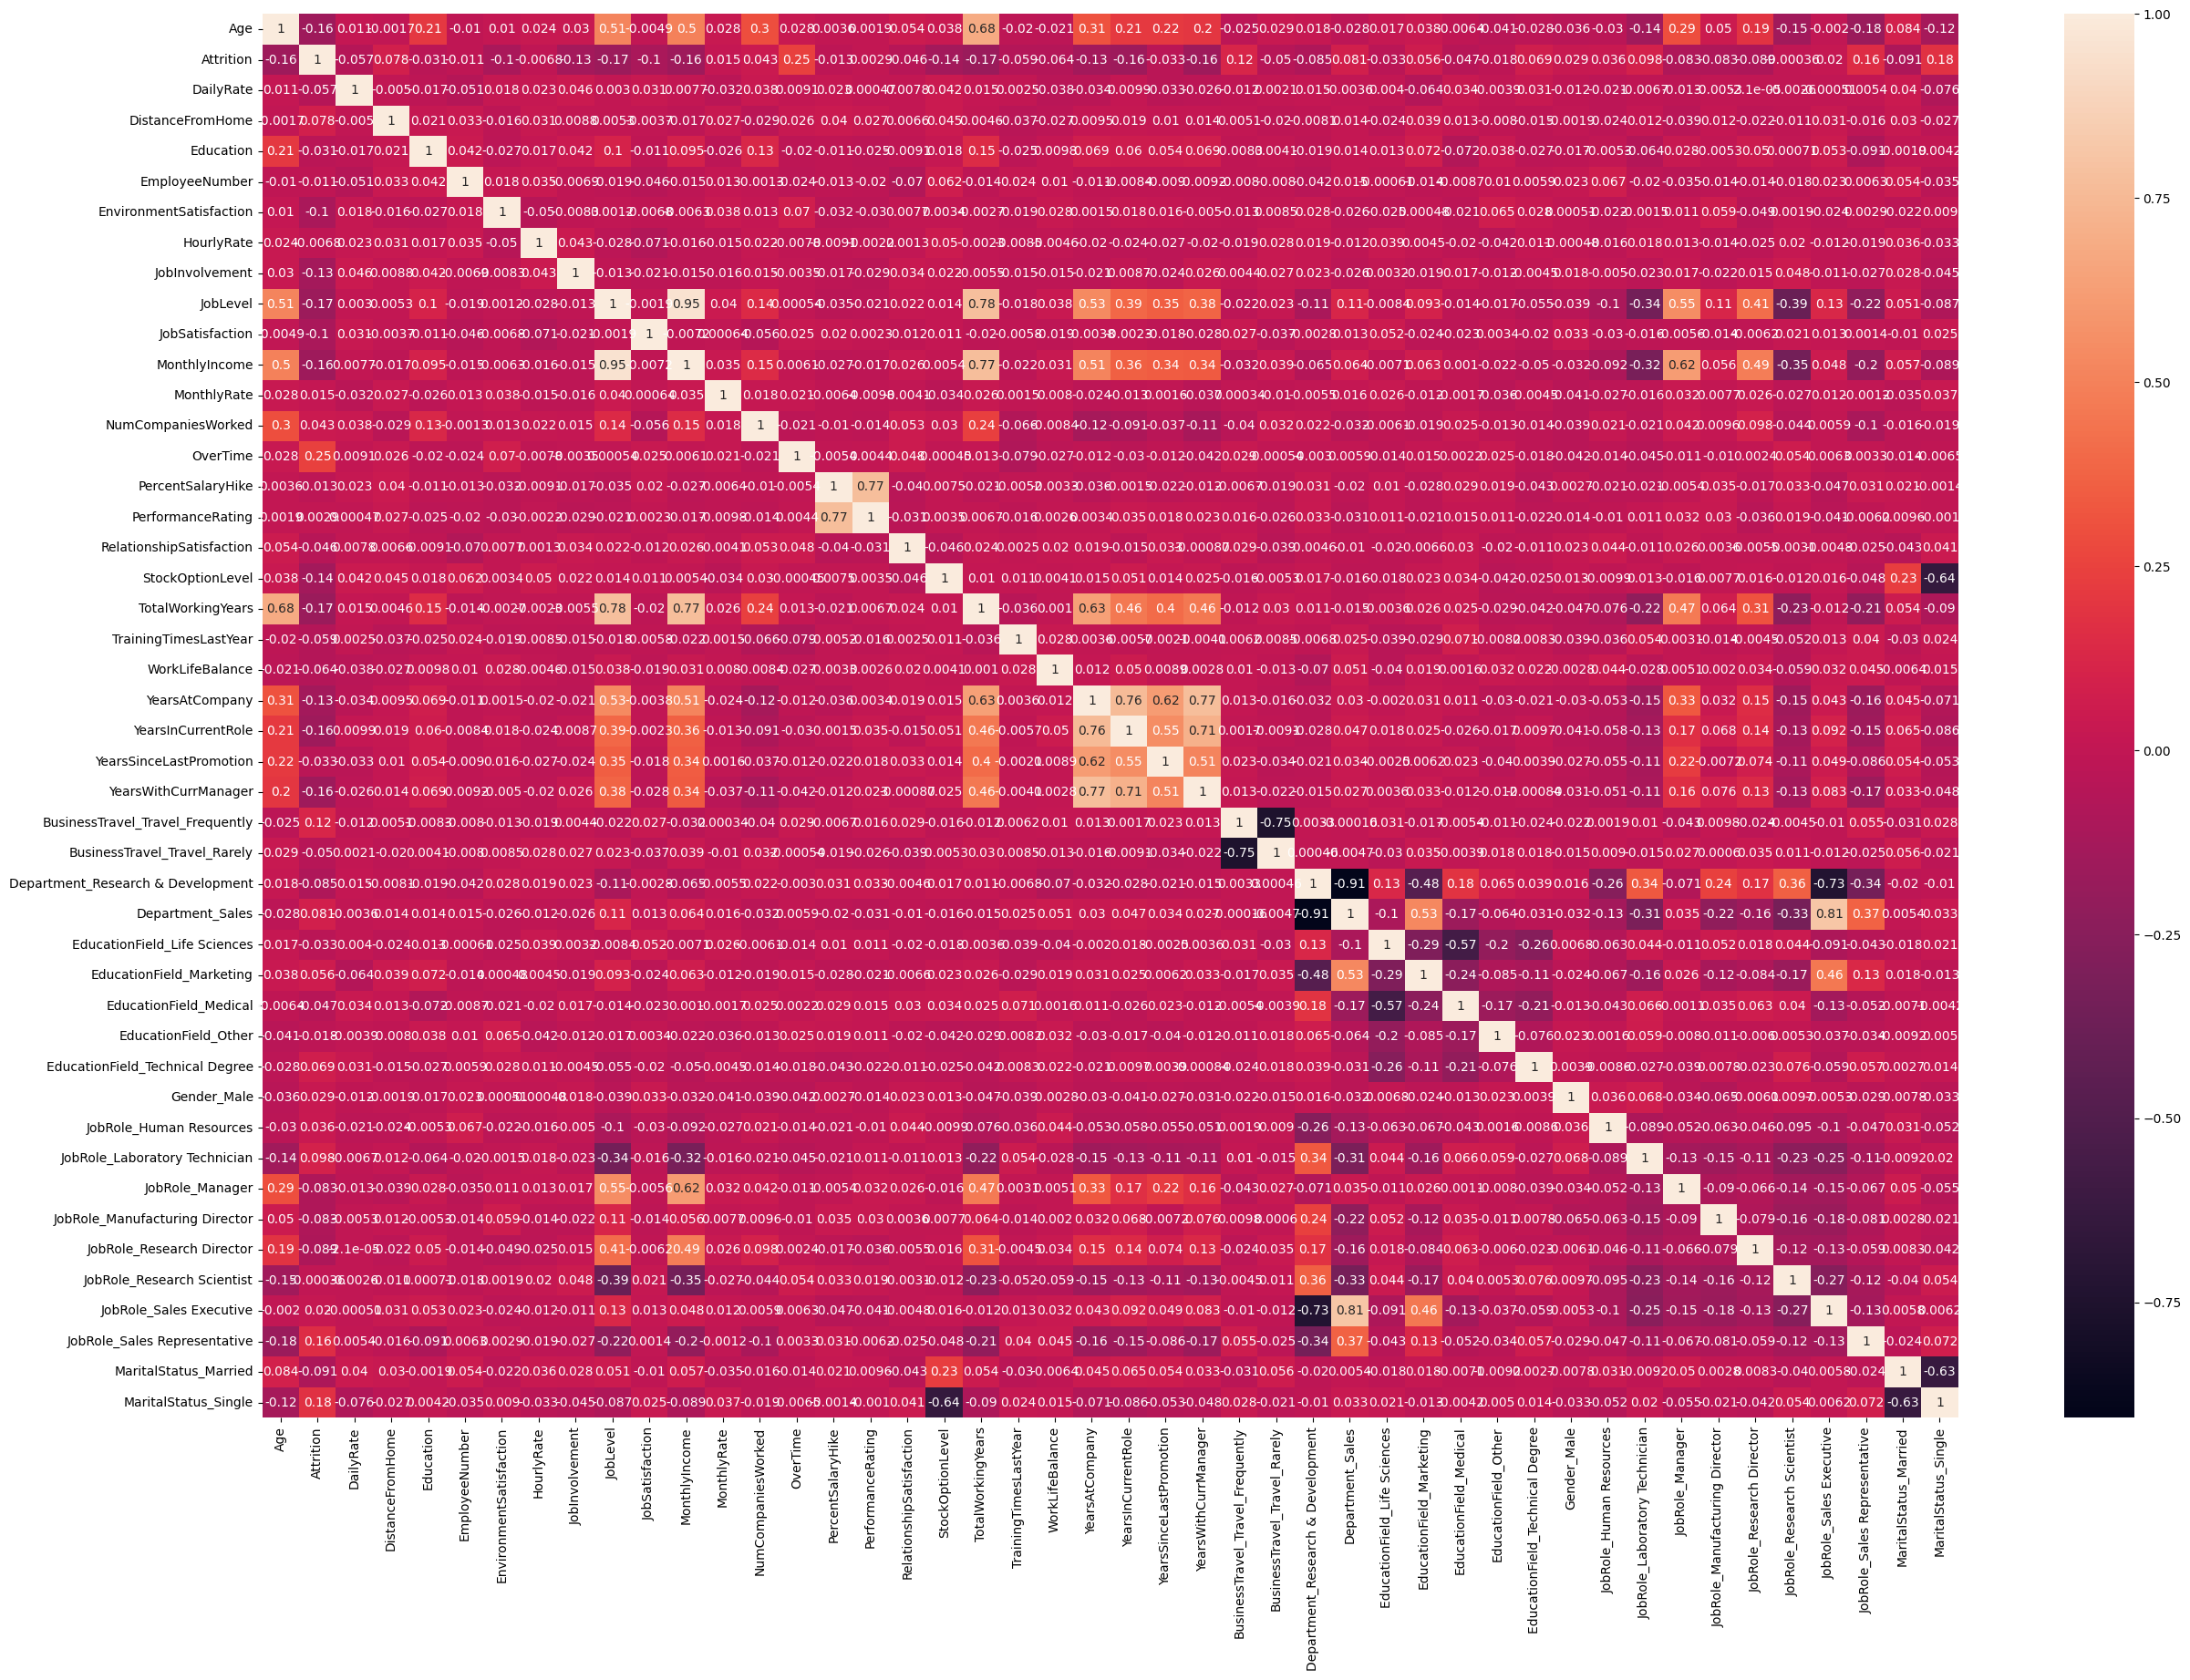

In [28]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(churn.corr(),annot = True)
plt.show()

### Feature Selection Using RFE

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [30]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [31]:
rfe.support_

array([False, False, False, False,  True, False, False,  True, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True])

In [32]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 15),
 ('DailyRate', False, 20),
 ('DistanceFromHome', False, 7),
 ('Education', False, 28),
 ('EnvironmentSatisfaction', True, 1),
 ('HourlyRate', False, 25),
 ('JobInvolvement', False, 4),
 ('JobLevel', True, 1),
 ('JobSatisfaction', False, 9),
 ('MonthlyIncome', False, 16),
 ('MonthlyRate', False, 27),
 ('NumCompaniesWorked', True, 1),
 ('OverTime', True, 1),
 ('PercentSalaryHike', False, 29),
 ('PerformanceRating', False, 30),
 ('RelationshipSatisfaction', False, 10),
 ('StockOptionLevel', False, 8),
 ('TotalWorkingYears', True, 1),
 ('TrainingTimesLastYear', False, 19),
 ('WorkLifeBalance', False, 12),
 ('YearsAtCompany', False, 2),
 ('YearsInCurrentRole', True, 1),
 ('YearsSinceLastPromotion', True, 1),
 ('YearsWithCurrManager', True, 1),
 ('BusinessTravel_Travel_Frequently', True, 1),
 ('BusinessTravel_Travel_Rarely', False, 3),
 ('Department_Research & Development', True, 1),
 ('Department_Sales', False, 13),
 ('EducationField_Life Sciences', True, 1),
 ('Educati

In [33]:
col = X_train.columns[rfe.support_]

In [34]:
X_train.columns[~rfe.support_]

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'BusinessTravel_Travel_Rarely', 'Department_Sales',
       'EducationField_Marketing', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married'],
      dtype='object')

##### Assessing the model with StatsModels

In [36]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                     1013
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.21
Date:                Thu, 10 Nov 2022   Deviance:                       642.42
Time:                        18:40:44   Pearson chi2:                 2.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2309
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.6017      0.257    -10.128      0.000      -3.105      -2.098
EnvironmentSatisfaction              -0.4376      0.104     -4.227      0.000      -0.640      -0.235
JobLevel                             -0.6947      0.213     -3.269      0.001      -1.111      -0.278
NumCompaniesWorked                    0.4041      0.104      3.886      0.000       0.200       0.608
OverTime                              1.7922      0.215      8.334      0.000       1.371       2.214
TotalWorkingYears                    -0.3435      0.211     -1.629      0.103      -0.757       0.070
YearsInCurrentRole                   -0.5594      0.187     -2.988      0.003      -0.926      -0.193
YearsSinceLastPromotion               0.9907      0.162      6.126      0.000       0.674       1.308
YearsWithCurrManager                 -0.4897      0.175     -2.797      0.005      -0.833      -0.147
BusinessTravel_Travel_Frequently      0.9292      0.230      4.033      0.000       0.478       1.381
Department_Research & Development    -0.9015      0.261     -3.458      0.001      -1.413      -0.390
EducationField_Life Sciences         -0.6013      0.274     -2.194      0.028      -1.138      -0.064
EducationField_Medical               -0.9274      0.297     -3.127      0.002      -1.509      -0.346
EducationField_Other                 -0.5961      0.533     -1.119      0.263      -1.640       0.448
JobRole_Laboratory Technician         1.0446      0.277      3.772      0.000       0.502       1.587
MaritalStatus_Single                  1.0288      0.209      4.933      0.000       0.620       1.438
=====================================================================================================
"""

In [37]:
col = col.drop('EducationField_Other', 1)
col

Index(['EnvironmentSatisfaction', 'JobLevel', 'NumCompaniesWorked', 'OverTime',
       'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'Department_Research & Development', 'EducationField_Life Sciences',
       'EducationField_Medical', 'JobRole_Laboratory Technician',
       'MaritalStatus_Single'],
      dtype='object')

In [38]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                     1014
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.87
Date:                Thu, 10 Nov 2022   Deviance:                       643.75
Time:                        18:41:27   Pearson chi2:                 3.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2300
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.6715      0.252    -10.607      0.000      -3.165      -2.178
EnvironmentSatisfaction              -0.4455      0.103     -4.315      0.000      -0.648      -0.243
JobLevel                             -0.7145      0.212     -3.369      0.001      -1.130      -0.299
NumCompaniesWorked                    0.4016      0.104      3.873      0.000       0.198       0.605
OverTime                              1.7902      0.215      8.336      0.000       1.369       2.211
TotalWorkingYears                    -0.3355      0.210     -1.594      0.111      -0.748       0.077
YearsInCurrentRole                   -0.5619      0.187     -2.999      0.003      -0.929      -0.195
YearsSinceLastPromotion               1.0019      0.162      6.197      0.000       0.685       1.319
YearsWithCurrManager                 -0.4913      0.175     -2.801      0.005      -0.835      -0.148
BusinessTravel_Travel_Frequently      0.9246      0.230      4.020      0.000       0.474       1.375
Department_Research & Development    -0.9659      0.254     -3.803      0.000      -1.464      -0.468
EducationField_Life Sciences         -0.4843      0.255     -1.901      0.057      -0.984       0.015
EducationField_Medical               -0.8051      0.277     -2.909      0.004      -1.348      -0.263
JobRole_Laboratory Technician         1.0188      0.276      3.696      0.000       0.478       1.559
MaritalStatus_Single                  1.0260      0.208      4.924      0.000       0.618       1.434
=====================================================================================================
"""

In [39]:
col = col.drop('TotalWorkingYears', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                     1015
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.19
Date:                Thu, 10 Nov 2022   Deviance:                       646.38
Time:                        18:41:48   Pearson chi2:                 2.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2280
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.6311      0.249    -10.554      0.000      -3.120      -2.143
EnvironmentSatisfaction              -0.4426      0.103     -4.295      0.000      -0.645      -0.241
JobLevel                             -0.9320      0.165     -5.665      0.000      -1.254      -0.610
NumCompaniesWorked                    0.3495      0.099      3.547      0.000       0.156       0.543
OverTime                              1.7535      0.213      8.251      0.000       1.337       2.170
YearsInCurrentRole                   -0.6017      0.185     -3.254      0.001      -0.964      -0.239
YearsSinceLastPromotion               0.9768      0.160      6.112      0.000       0.664       1.290
YearsWithCurrManager                 -0.5419      0.171     -3.165      0.002      -0.878      -0.206
BusinessTravel_Travel_Frequently      0.9183      0.229      4.006      0.000       0.469       1.368
Department_Research & Development    -1.0065      0.252     -3.987      0.000      -1.501      -0.512
EducationField_Life Sciences         -0.4830      0.254     -1.902      0.057      -0.981       0.015
EducationField_Medical               -0.8015      0.276     -2.903      0.004      -1.343      -0.260
JobRole_Laboratory Technician         0.9867      0.274      3.602      0.000       0.450       1.524
MaritalStatus_Single                  1.0513      0.207      5.069      0.000       0.645       1.458
=====================================================================================================
"""

In [40]:
col = col.drop('EducationField_Life Sciences', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                     1016
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -325.00
Date:                Thu, 10 Nov 2022   Deviance:                       650.00
Time:                        18:42:00   Pearson chi2:                 2.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2253
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.8100      0.235    -11.961      0.000      -3.270      -2.350
EnvironmentSatisfaction              -0.4241      0.102     -4.156      0.000      -0.624      -0.224
JobLevel                             -0.9418      0.165     -5.705      0.000      -1.265      -0.618
NumCompaniesWorked                    0.3505      0.098      3.576      0.000       0.158       0.543
OverTime                              1.7401      0.212      8.225      0.000       1.325       2.155
YearsInCurrentRole                   -0.5895      0.184     -3.209      0.001      -0.950      -0.229
YearsSinceLastPromotion               0.9609      0.159      6.031      0.000       0.649       1.273
YearsWithCurrManager                 -0.5358      0.172     -3.120      0.002      -0.872      -0.199
BusinessTravel_Travel_Frequently      0.9082      0.228      3.985      0.000       0.462       1.355
Department_Research & Development    -1.1329      0.244     -4.652      0.000      -1.610      -0.656
EducationField_Medical               -0.4956      0.226     -2.193      0.028      -0.939      -0.053
JobRole_Laboratory Technician         0.9869      0.274      3.599      0.000       0.449       1.524
MaritalStatus_Single                  1.0107      0.205      4.931      0.000       0.609       1.412
=====================================================================================================
"""

In [41]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

178     0.157993
971     0.005557
1172    0.185989
667     0.485625
399     0.131445
634     0.158116
266     0.047378
210     0.017066
318     0.379207
239     0.532976
dtype: float64

In [42]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15799268, 0.00555722, 0.18598904, 0.4856246 , 0.13144458,
       0.15811587, 0.04737791, 0.01706603, 0.37920687, 0.53297556])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [43]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['EmployeeNumber'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,EmployeeNumber
0,0,0.157993,178
1,0,0.005557,971
2,0,0.185989,1172
3,1,0.485625,667
4,0,0.131445,399


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [44]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,EmployeeNumber,predicted
0,0,0.157993,178,0
1,0,0.005557,971,0
2,0,0.185989,1172,0
3,1,0.485625,667,0
4,0,0.131445,399,0


In [45]:
y_train_pred_final.value_counts()

Churn  Churn_Prob  EmployeeNumber  predicted
0      0.000109    417             0            1
       0.153957    712             0            1
       0.175310    1198            0            1
       0.175897    1347            0            1
       0.178939    5               0            1
                                               ..
       0.042436    227             0            1
       0.042905    81              0            1
       0.043219    621             0            1
       0.043230    1242            0            1
1      0.922579    357             1            1
Length: 1029, dtype: int64

In [46]:
from sklearn import metrics

In [47]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[841  21]
 [ 98  69]]


In [48]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8843537414965986


#### Checking VIFs

In [49]:
# Checking the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Department_Research & Development,2.25
4,YearsInCurrentRole,2.24
6,YearsWithCurrManager,2.16
10,JobRole_Laboratory Technician,1.54
5,YearsSinceLastPromotion,1.53
9,EducationField_Medical,1.46
1,JobLevel,1.40
11,MaritalStatus_Single,1.32
3,OverTime,1.28
7,BusinessTravel_Travel_Frequently,1.19


## Metrics beyond simply accuracy

In [51]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [52]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.41317365269461076

In [53]:
# Let us calculate specificity
TN / float(TN+FP)

0.9756380510440835

In [54]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.024361948955916472


In [55]:
# positive predictive value 
print (TP / float(TP+FP))

0.7666666666666667


In [56]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8956336528221512


### Plotting the ROC Curve

In [57]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [58]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

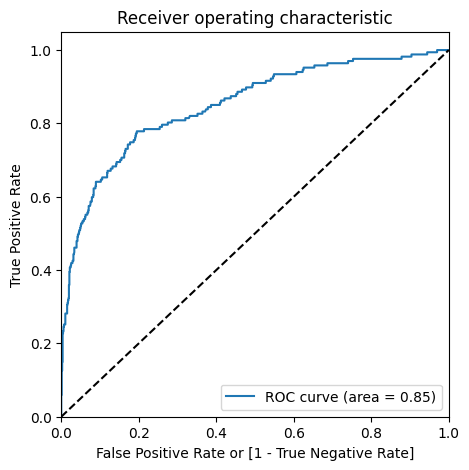

In [59]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [60]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,EmployeeNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.157993,178,0,1,1,0,0,0,0,0,0,0,0
1,0,0.005557,971,0,1,0,0,0,0,0,0,0,0,0
2,0,0.185989,1172,0,1,1,0,0,0,0,0,0,0,0
3,1,0.485625,667,0,1,1,1,1,1,0,0,0,0,0
4,0,0.131445,399,0,1,1,0,0,0,0,0,0,0,0


In [61]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.162293  1.000000  0.000000
0.1   0.1  0.658892  0.838323  0.624130
0.2   0.2  0.800777  0.760479  0.808585
0.3   0.3  0.864917  0.640719  0.908353
0.4   0.4  0.878523  0.526946  0.946636
0.5   0.5  0.884354  0.413174  0.975638
0.6   0.6  0.869776  0.251497  0.989559
0.7   0.7  0.861030  0.161677  0.996520
0.8   0.8  0.849368  0.077844  0.998840
0.9   0.9  0.840622  0.017964  1.000000


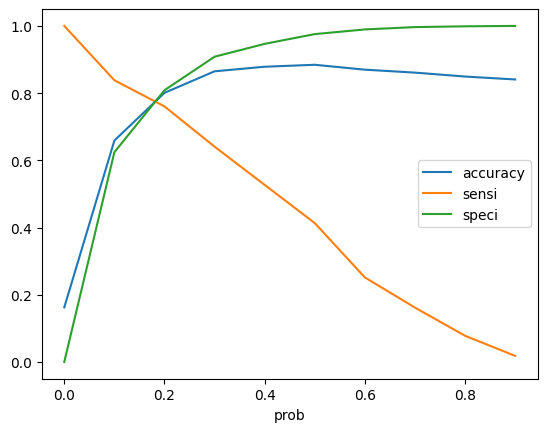

In [62]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [63]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,EmployeeNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.157993,178,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.005557,971,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.185989,1172,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.485625,667,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.131445,399,0,1,1,0,0,0,0,0,0,0,0,0


In [64]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8007774538386784

In [65]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[697, 165],
       [ 40, 127]], dtype=int64)

In [66]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [67]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7604790419161677

In [68]:
# Let us calculate specificity
TN / float(TN+FP)

0.808584686774942

In [69]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.191415313225058


In [70]:
# Positive predictive value 
print (TP / float(TP+FP))

0.4349315068493151


In [71]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9457259158751696


## Precision and Recall

In [72]:
#Looking at the confusion matrix again

In [73]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[841,  21],
       [ 98,  69]], dtype=int64)

##### Precision
TP / TP + FP

In [74]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7666666666666667

##### Recall
TP / TP + FN

In [75]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.41317365269461076

Using sklearn utilities for the same

In [76]:
from sklearn.metrics import precision_score, recall_score

In [77]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7666666666666667

In [78]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.41317365269461076

### Precision and recall tradeoff

In [79]:
from sklearn.metrics import precision_recall_curve

In [80]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 1024    0
 1025    0
 1026    0
 1027    0
 1028    1
 Name: Churn, Length: 1029, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1024    0
 1025    0
 1026    0
 1027    0
 1028    0
 Name: predicted, Length: 1029, dtype: int64)

In [81]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

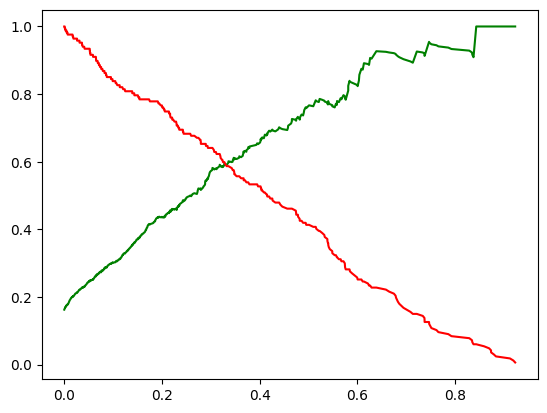

In [82]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [83]:
X_test[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']] = scaler.transform(X_test[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])

In [84]:
X_test = X_test[col]
X_test.head()

,EnvironmentSatisfaction,JobLevel,NumCompaniesWorked,OverTime,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,Department_Research & Development,EducationField_Medical,JobRole_Laboratory Technician,MaritalStatus_Single
880,0.259652,-0.955776,-0.692427,0,-0.603279,-0.064850,-0.589081,1,1,0,1,0
152,-0.646049,-0.048494,-0.294600,1,0.767689,0.550183,0.259888,0,0,0,0,0
1466,1.165353,0.858788,0.501052,0,0.767689,-0.372367,0.825868,0,1,1,0,0
1084,1.165353,0.858788,-0.692427,1,1.316076,1.780249,0.542878,0,0,0,0,0
1086,0.259652,1.766069,-0.692427,1,0.493495,3.317832,1.391847,1,1,1,0,1


In [85]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [86]:
y_test_pred = res.predict(X_test_sm)

In [87]:
y_test_pred[:10]

880     0.290802
152     0.285650
1466    0.001092
1084    0.122216
1086    0.344306
1392    0.032600
57      0.431369
956     0.039541
1400    0.543770
1175    0.011916
dtype: float64

In [88]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [89]:
# Let's see the head
y_pred_1.head()

,0
880,0.290802
152,0.285650
1466,0.001092
1084,0.122216
1086,0.344306


In [90]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [91]:
# Putting EmployeeNumber to index
y_test_df['EmployeeNumber'] = y_test_df.index

In [92]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [93]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [94]:
y_pred_final.head()

,Attrition,EmployeeNumber,0
0,0,880,0.290802
1,0,152,0.285650
2,0,1466,0.001092
3,0,1084,0.122216
4,0,1086,0.344306


In [95]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Attrition_Prob'})

In [96]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['EmployeeNumber','Attrition','Attrition_Prob'], axis=1)

In [97]:
y_pred_final.head()

,EmployeeNumber,Attrition,Attrition_Prob
0,880,0,0.290802
1,152,0,0.285650
2,1466,0,0.001092
3,1084,0,0.122216
4,1086,0,0.344306


In [98]:
y_pred_final['final_predicted'] = y_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [99]:
y_pred_final.head()

,EmployeeNumber,Attrition,Attrition_Prob,final_predicted
0,880,0,0.290802,1
1,152,0,0.285650,1
2,1466,0,0.001092,0
3,1084,0,0.122216,0
4,1086,0,0.344306,1


In [100]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Attrition, y_pred_final.final_predicted)

0.7709750566893424

In [101]:
confusion2 = metrics.confusion_matrix(y_pred_final.Attrition, y_pred_final.final_predicted )
confusion2

array([[299,  72],
       [ 29,  41]], dtype=int64)

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5857142857142857

In [104]:
# Let us calculate specificity
TN / float(TN+FP)

0.8059299191374663